In [199]:
import yfinance as yf #To import Yfinance in order to be able to download Tesla's historical data
import numpy as np #To import NumPy to be able to perform mathemetical operations on the arrays
import pandas as pd #To allow us to manipulate the columns in our dataframe or arrays
import os

In [200]:
TSLA = yf.download("TSLA", start="2021-05-16", end="2022-05-15")
#We call the download function of yFinance to download the historical data on Tesla Inc.


[*********************100%***********************]  1 of 1 completed


In [201]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-17,575.549988,589.729980,561.200012,576.830017,576.830017,32390400
2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600
2021-05-19,552.549988,566.210022,546.979980,563.460022,563.460022,39578400
2021-05-20,575.000000,588.849976,571.070007,586.780029,586.780029,30821100
2021-05-21,596.109985,596.679993,580.000000,580.880005,580.880005,26030600
...,...,...,...,...,...,...
2022-05-09,836.450012,845.630005,781.150024,787.109985,787.109985,30270100
2022-05-10,819.309998,825.359985,774.250000,800.039978,800.039978,28133900
2022-05-11,795.000000,809.770020,727.200012,734.000000,734.000000,32408200


In [106]:
TSLA_Close=TSLA['Adj Close'] 
#The use of panda libraries have allowed us to store the values of Adj Close in the TSLA array
#to a new array TSLA_Close

In [107]:
TSLA_Close.head() 

Date
2021-05-17    576.830017
2021-05-18    577.869995
2021-05-19    563.460022
2021-05-20    586.780029
2021-05-21    580.880005
Name: Adj Close, dtype: float64

In [108]:
TSLA_Returns= np.log(TSLA_Close/TSLA_Close.shift(1))
#Using the imported NumPy library as np, we can call the logarithmic function using np.log
#This allows us to perform the operation on all the array.
#In this formula, we divide the first value with the next value of the array
#we then find its logarithmic value, and store it. This wouldnt be possible without NumPy

In [109]:
TSLA_Returns.head()

Date
2021-05-17         NaN
2021-05-18    0.001801
2021-05-19   -0.025253
2021-05-20    0.040554
2021-05-21   -0.010106
Name: Adj Close, dtype: float64

In [202]:
 sigma= np.sqrt(252)*TSLA_Returns.std() #to calculate the annualized volatility of TESLA Inc
    
 print('The annualized volatility is', round(sigma*100,2),'%' )

The annualized volatility is 56.75 %


In [203]:
import matplotlib.pyplot as plt #this is to import the matplotlib library and use plt to call on the functions of that library

Text(0.5, 1.0, 'Historical Price for TSLA')

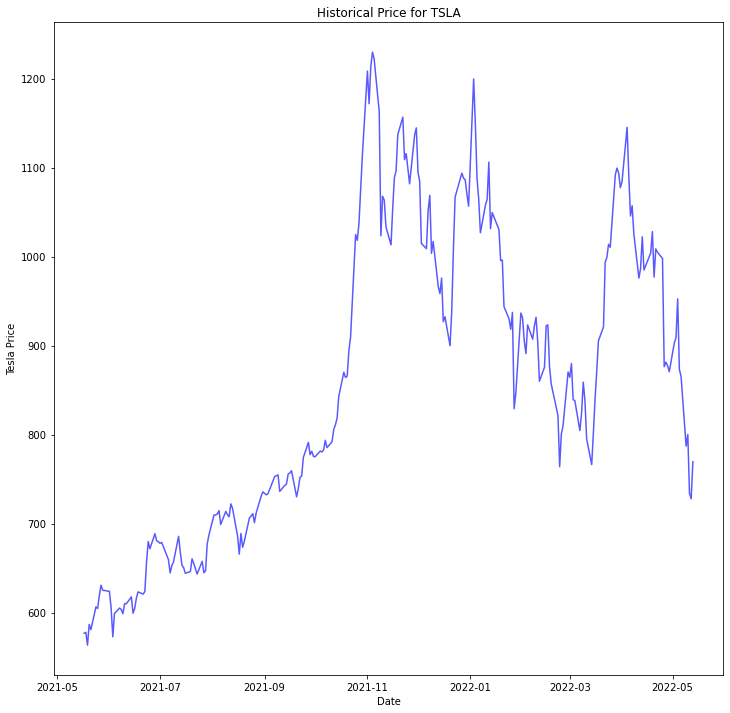

In [204]:
 #To plot the movement of the adjusted closing prices of Tesla between 16 May 2021 ans 15 May 2022
fig, ax = plt.subplots(1, 1, figsize=(12, 12)) #we call the subplot function of matplotlib.pyplot
 patches = ax.plot(TSLA_Close, alpha=0.65, color='blue') #we call the plot function to decide on the color and size of our graph
ax.set_xlabel('Date') #to set the X Axis label
ax.set_ylabel('Tesla Price') #to set the Y Axis label
ax.set_title('Historical Price for ' + 'TSLA') #To set the title of the graph

In [205]:
import scipy.stats as si #we need this to perform cumulative distribution
import os #we need this to print

In [251]:
def NR_ImpVol(S, K, T, MV, r,vol, iteration,tolerance):
    #We are definining a function called N_R_Imp_Vol to perfrom the Newton-Raphson iteration of Implied Volatity Calculation
    #The formula has 7 arguments defined below, These arguments are needed for the Black Scholes Model
    #S: spot price of the underlying asset
    #K: strike price of the option
    #T: time to maturity
    #MV: Market Value of the Call or Put option
    #r: risk free rate
    # vol: annualized historical volatility of the underlying asset
    # iteration: this is the number of interation the Newton-Raphson should run
    #tolerance: this is the tolerance level, meaning the lowest difference we can accept between VBS (Value using Black Scholes) and MV
    #for as long as the absolute value of the difference between VBS and MV is > than tolerance,the iteration shall continue
  
    
    for i in range(0, iteration): #we are setting the condtion of the iteration
        d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
        #value of  D1 and D2  from BSM to solve for option price, using NumPy function as np.
        VBS = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)#value of a call option using BSM
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0) #We Calculate the Vega of the option, same if Call or Put
        diff = MV - VBS
        #WE look at the difference between VBS and MV, theoretical price option using Black Scholes and the Market Value
        #This is because the Implied Volatility is one that satisfies VBS=MV

        if (abs(diff) < tolerance): 
            #We assess the absolute difference of VBS and MV and compare to the tolerance level we set
            #if the difference is below the tolerance, then the volatility that satisified this condition is our implied volatility
            return vol
        else: 
            vol = vol + diff/vega
            #if the difference is not below tolerance then we apply the Netwon Raphson iteration to look for a new volatility 
            #𝜎_(𝑛+1)=𝜎_𝑛−(𝑉_𝑚𝑘𝑡−𝑉_𝐵𝑆 (𝜎_𝑛 ))/((𝜕𝑉_𝐵𝑆 (𝜎_𝑛 ))/𝜕𝜎)
        
        print (i,vol,diff) #to print the number of interation performed, the volatity and the difference betwen VBS and MV
    return vol
#This process will continue until we find a volatility that satisfies VBS= MV, the market value


In [252]:
Spot=756.40 #from Yahoo Finance
Strike= 700 #From Assignment, I had to amend from the 1000 given,that means option value is 0 and vega is near 0 and causes error
CallPrice= 60.85 #From Yahoo Finance
Time=3/253 #Days to maturity as of 17 May 2022, 3 days over 253 trading days
risk=0.02 #from assignment

In [253]:
ImpliedVolatility= NR_ImpVol(Spot,Strike,Time,CallPrice,risk,sigma,100,0.0000001) #
print('The implied volatility of Tesla Inc is', round(ImpliedVolatility*100,2) , '% ' ) 

0 0.7104330002826977 2.0476649080851317
1 0.6914906441965123 -0.36114914692884525
2 0.6912241606626534 -0.004940443318353971
3 0.6912241059856103 -1.0132634074011548e-06
The implied volatility of Tesla Inc is 69.12 % 


## Valuation of European Call Option Using Binomial Tree

### Step 1: Define the variables

In [237]:
S0 = 25   # Spot Price of underlying given in the assignment
vol= 0.2  #volatility of the underlying given in the assignment
K = 24    # strike price of the option contract given in the assignment
T = 1/2   # time to maturity, 6 months so it 1/2
r = 0.05  # risk free rate given in the assigment
N = 2     # number of steps for the tree 

### Step 2: Calculate u,d, p and q

In [245]:
dT = float(T) / N                             # timestep, time within each step, 1/4
u = np.exp(vol * np.sqrt(dT))                 # up factor, if the price moves up we multiply by u
d = 1.0 / u                                   # down factor , if the price moves down we muliply by d
print ('the up factor u is: '+ str(u )  )     # to display the value of u


the up factor u is: 1.1051709180756477


In [246]:
print ('the down factor d is: '+ str(d)  )  # to display the value of u

the down factor d is: 0.9048374180359595


In [242]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q=1-p                 # risk neutral down probability
print ('the risk neutral up probability p is: '+ str(p)) #to print p

the risk neutral up probability p is: 0.537808371956414


### Step 3: Contruct the Treee

In [243]:
S = np.zeros((N + 1, N + 1)) # to construct the number of the steps for my tree, we will have 2 steps
S[0, 0] = S0 #we set the first value to be S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u #for an up move it is the previous value of S multiplied by u
        S[i+1, t] = S[i, t-1] * d #for a down move it is the previous value of S multiplied by d
    z += 1

In [244]:
S #to print the spot prices 

array([[25.        , 27.62927295, 30.53506895],
       [ 0.        , 22.62093545, 25.        ],
       [ 0.        ,  0.        , 20.46826883]])

### Step 4: Find the option vale at the last step

In [247]:
S_T = S[:,-1] #we define this to be the value of the spot price at the last step
V = np.zeros((N + 1, N + 1)) #we define an array V such as our Tree

V[:,-1] = np.maximum(S_T-K, 0.0)
#We find the last step of V and we find option value which is Maximum of Spot at that node - Strike or 0

V

array([[0.        , 0.        , 6.53506895],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        ]])

### Step 5: Find the Value at earlier steps

In [248]:
for j in range(N-1, -1, -1): #we contruct a loop to move backwards
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
 #we are running backwards using brownian motion to find value at earlier nodes
V #we print the option value at each node

array([[2.32838692, 3.92740574, 6.53506895],
       [0.        , 0.53112761, 1.        ],
       [0.        , 0.        , 0.        ]])

In [235]:
print('European Call ' +" value is", str( V[0,0]))

European Call  value is 2.3283869193612463
